<h1 style= "front-size:3rem;color:orange;"> *$* Prediction Gold Price *$* </h1>

<img src= "https://www.shutterstock.com/image-photo/wooden-cubes-word-gold-price-260nw-2264493389.jpg">

 ### This project implement a machine learning model to predict future stock prices nased on historical stock prices. It uses a dataset of historical stock prices and fetures to train and avluete the model 

### Reguired Librarries

     We will be using the following libraries in our project:
        - pandas: Used for data manipulation and analyst
        - numpy: Used for numerical operations
        - re: Used for string operations 
        - sklearn: Used for building machine learning models
        - tensorflow: library for deep learnimg
        - seaborn

In [45]:
import numpy  as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout


import warnings
warnings.filterwarnings('ignore')

print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(1570.0918, shape=(), dtype=float32)


###  Load Dataset 
For this project I will use the gold price dataset for the last ten years, with  can be  downloaded from [Kaggle](https://www.kaggle.com/datasets/farzadnekouei/gold-price-10-years-20132023/data?select=Gold+Price+%282013-2023%29.csv). The data spans from year 2013 to 2022 year.


In [46]:
# load the dataset 
df = pd.read_csv("./Dataset/Gold_Price.csv")
df.head(3)




,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%


In [48]:
df.shape

(2583, 7)

### Data Preprocessing 

In [49]:
df.drop(columns=['Vol.','Change %'],inplace=True)

#### Transforming Data 

      Date feature is stored as object in the frame. to increase the speed , 
      we convert it's data type to datetime and sort this feature in ascending order:
   

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by='Date',ascending=True)
df=df.reset_index(drop=True )

####   The "," sing is redundant in the dataset. First , we remove it from the entrie dataset and then change the datatype of the numerycal variables to float :



In [51]:
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',':''},regex = True)
df[NumCols] = df[NumCols].astype('float64')


In [52]:
df.head()


,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


### Cheking dataset
   

In [72]:
df['Daily_mean'] == (df['Price']+df['Open']+df['High']+df['Low'])/4 
# it's not a correct mean, but it's the most near one we can do
df.head()

,Date,Price,Open,High,Low,Daily_mean
0,2013-01-02,1689.9,1675.8,1695.0,1672.1,1683.200
1,2013-01-03,1675.6,1688.0,1689.3,1664.3,1679.300
2,2013-01-04,1649.9,1664.4,1664.4,1630.0,1652.175
3,2013-01-07,1647.2,1657.3,1663.8,1645.3,1653.400
4,2013-01-08,1663.2,1651.5,1662.6,1648.8,1656.525


In [79]:
def info_dataset(df):
    
    print("Top 5 of Dataset:", df.head(), 
          sep='\n', end = '\n\n')
    print(f"Total number of rows : {df.shape[0]}", 
          sep='\n', end = '\n\n')
    print(f"Total number of columns: {df.shape[1]}",
          sep='\n', end = '\n\n')
    
    print(f"Total number of missing values:", df.isnull().sum(), 
          sep='\n', end = '\n\n')
    print(f"Types of variables:", df.dtypes, 
          sep='\n', end = '\n\n')
    
  
info_dataset(df)

Top 5 of Dataset:
        Date   Price    Open    High     Low  Daily_mean
0 2013-01-02  1689.9  1675.8  1695.0  1672.1    1683.200
1 2013-01-03  1675.6  1688.0  1689.3  1664.3    1679.300
2 2013-01-04  1649.9  1664.4  1664.4  1630.0    1652.175
3 2013-01-07  1647.2  1657.3  1663.8  1645.3    1653.400
4 2013-01-08  1663.2  1651.5  1662.6  1648.8    1656.525

Total number of rows : 2583

Total number of columns: 6

Total number of missing values:
Date          0
Price         0
Open          0
High          0
Low           0
Daily_mean    0
dtype: int64

Types of variables:
Date          datetime64[ns]
Price                float64
Open                 float64
High                 float64
Low                  float64
Daily_mean           float64
dtype: object



### Visualizing Gold Price Historical Data

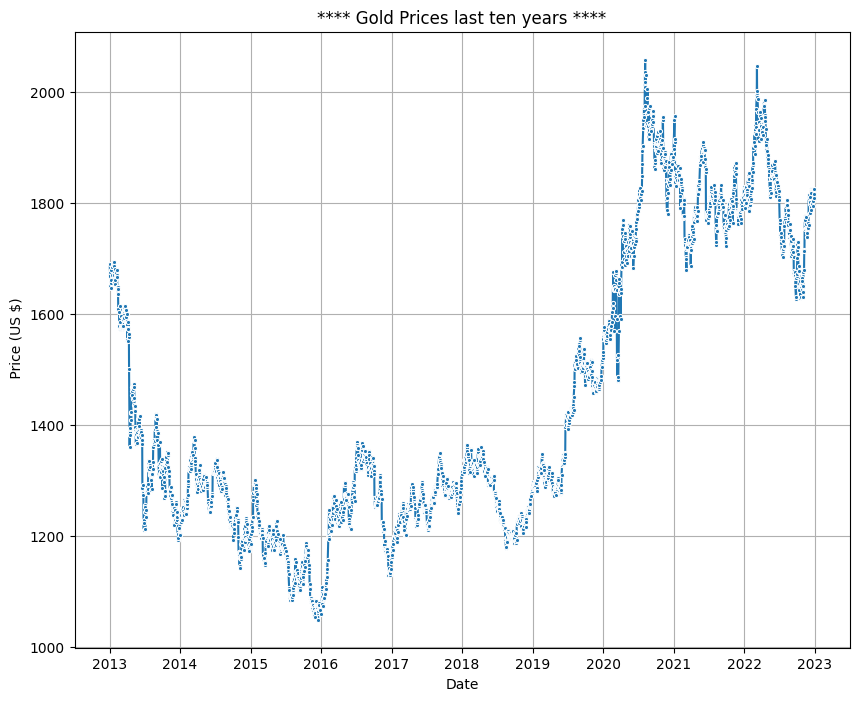

In [110]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x="Date",y="Price", marker=".")
plt.title("**** Gold Prices last ten years ****")
plt.ylabel(" Price (US $)")
plt.grid()
plt.show()


 # da se opravi 

Text(0.5, 1.02, 'Correlation Matrix of all')

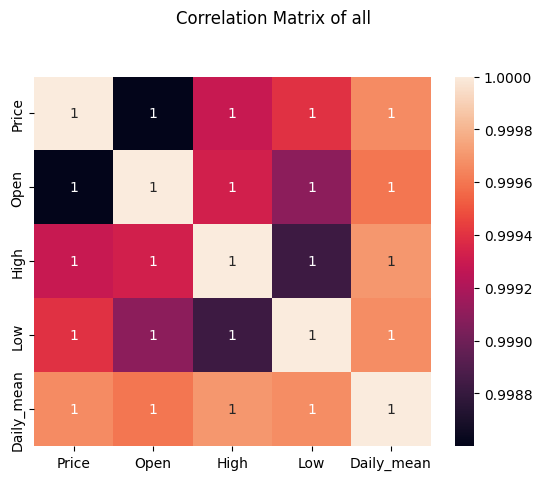

In [111]:

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.suptitle('Correlation Matrix of all', y=1.02)

In [112]:
#df = df.set_index('Date')
#corr = df.corr()
#corr.style.background_gradient(cmap = 'coolwarm')

### Split data into train and test 

In [113]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Daily_mean'], dtype='object')

In [114]:
df.head(3)

,Date,Price,Open,High,Low,Daily_mean
0,2013-01-02,1689.9,1675.8,1695.0,1672.1,1683.200
1,2013-01-03,1675.6,1688.0,1689.3,1664.3,1679.300
2,2013-01-04,1649.9,1664.4,1664.4,1630.0,1652.175


In [115]:
#df=df.drop(columns=['Date','Open','Low'])
#df.head(3)

- I wil use  "Daily_ men"  like independent and "Price" like preducted(dependent) features

In [116]:
X = df.Daily_mean.values.round(2).reshape(-1,1)
## to see firs 3 rows 
print (X[:3,:])
y = df.Price.values
print(y)

[[1683.2 ]
 [1679.3 ]
 [1652.18]]
[1689.9 1675.6 1649.9 ... 1815.8 1826.  1826.2]


### Split data into train and test

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)

(1937, 1)
(1937,)


### Fit the model 
  - The first model, which i will use is a  ***LinearRegression***  model

In [118]:
#Create linear regression object and train the model

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test).round(2)

In [119]:
print(f'Slope:\n {reg.coef_}')
print(f'Interept: \n {reg.intercept_}')


Slope:
 [1.00014475]
Interept: 
 -0.28908497887209705


### Visualize data and fitted model

In [120]:
b = reg.intercept_
m = reg.coef_
x = X_train.reshape(-1)




### Test the model 

In [121]:
#Make predictions use the testing set
y_pred = reg.predict(X_test).round(2)
y_pred[:4]

array([1286.3 , 1399.61, 1779.77, 1278.63])

In [122]:
# y = m*x+b
#print( list(X_test[:3,0]))
##print(list(y_test[:3]))

In [123]:
#y = m*1415.9+b
#print(y.round(2))

### How well the model performs
- comparison between real and predicted data 

In [124]:

print (y_test[:8].round(2))
print(y_pred[:8].round(2))

[1294.7 1411.8 1780.7 1275.4 1316.1 1260.4 1076.3 1817.2]
[1286.3  1399.61 1779.77 1278.63 1319.88 1249.69 1079.97 1803.12]


### Mean Absolute Error
- MAE is the meanabsolut value of the errors

In [125]:
#The mean absolut error
mae = mean_absolute_error(y_test,y_pred)
mae

4.628761609907123

# TODO : Възможно ли е акава голяма стойност na MSE 

### Mean Squered Error 
- MSE is the mean of the squared errors. 
*** MSE "punishes" larger errors, which is quite useful in the real world ***

In [126]:
mse = mean_squared_error(y_test,y_pred)
mse

43.29154086687314

# TODO : NE vidqh da Ima SEQUARED  "https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" 

### Root Mean Squer Error 

In [129]:
#rmse =  mean_squared_error(y_test,y_pred, sequared= False)
#rmse 

 # Confusion matrix 53 1:49 

!!!!!!!!!!!!

In [38]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (X_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [46]:
Early_stop=EarlyStopping(monitor="loss",patience=10,mode="min")
callback=[Early_stop]

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
loss=model.evaluate(X_test,y_test)

 1/21 [>.............................] - ETA: 1s - loss: 69987.7500 - mean_absolute_error: 236.6798

21/21 [==============================] - 0s 4ms/step - loss: 65736.5000 - mean_absolute_error: 229.2386


In [55]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

test_predict = scaler.inverse_transform(test_predict)

21/21 [==============================] - 0s 13ms/step


NameError: name 'scaler' is not defined

#da se Proveri video 57 1:20

LSTM Model

### Model Destructure 

In [40]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(X_train, y_train, epochs= 75, batch_size= 32  )

Epoch 1/75
61/61 [==============================] - 10s 7ms/step - loss: 2121921.5000 - mean_absolute_error: 1433.6599
Epoch 2/75
61/61 [==============================] - 0s 7ms/step - loss: 1676414.2500 - mean_absolute_error: 1263.8293
Epoch 3/75
61/61 [==============================] - 0s 8ms/step - loss: 513865.4375 - mean_absolute_error: 626.2754
Epoch 4/75
61/61 [==============================] - 0s 7ms/step - loss: 73519.7031 - mean_absolute_error: 223.2349
Epoch 5/75
61/61 [==============================] - 0s 7ms/step - loss: 66478.9219 - mean_absolute_error: 229.4249
Epoch 6/75
61/61 [==============================] - 0s 7ms/step - loss: 66459.2344 - mean_absolute_error: 229.3129
Epoch 7/75
61/61 [==============================] - 0s 7ms/step - loss: 66479.4453 - mean_absolute_error: 229.6006
Epoch 8/75
61/61 [==============================] - 1s 8ms/step - loss: 66459.7812 - mean_absolute_error: 228.5665
Epoch 9/75
61/61 [==============================] - 0s 7ms/step - loss: 

In [31]:
#inverse y_test scaling
predictions = model.predict(X_test)

#inverse predictions scaling
#predictions = scaler.inverse_transform(predictions)
predictions.shape

#Vizualizaciq

21/21 [==============================] - 2s 5ms/step


(646, 1)

In [32]:
#inverse y_test scaling
#y_test = staticmethod.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

16.58

In [228]:
#train = X_train 
#test = X_test
#predictions = predictions 

#plt.figure(figsize= (16, 6))
##plt.title('Stock Price Prediction', fontsize= 16)
#plt.xlabel("Date", fontsize= 16)
#plt.ylabel('Price', fontsize= 16)
#plt.plot(X_train)
#plt.plot(X_test)
#plt.plot(predictions)
#plt.legend(['Train', 'Test', 'Predictions']#